Немного полезных функций

Загрузка данных из файла. Тут две полезные конструкции. 
Первая, это построчное чтение реализованное с помощью
~~~
for line in open(path+'/movies.dat'):
~~~
Вторая -- функция split(), позволяющая разделить строку, по символу или последовательности символов в качестве разделителя.


In [37]:
#Чтение данных

def loadMovieLens1M(path='./ml-1m'):
# Получить названия фильмов
    movies={}
    for line in open(path+'/movies.dat'):
        (id,title)=line.split('::')[0:2] #при желании тут можно добавить чтение жанров.
        movies[id]=title
# Загрузить данные
    prefs={}
    for line in open(path+'/ratings.dat'):
        (user,movieid,rating,ts)=line.split('::')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [38]:
%%time
critics = loadMovieLens1M()

Wall time: 746 ms


Тестовая и обучающая выборки.
Рассмотрим выбор или не выбор элемента с заданной вероятностью, для этого нам понадобится модуль random и функция random(). Последняя возвращает случайное число равномерно распределенное в диапазоне от 0 до 1. Этим удобно пользоваться, чтобы получить случайное событие с вероятностью \alpha достаточно использовать конструкцию 
~~~
if random()<alpha:
~~~

Функция seed() инициализирует генератор псевдослучайных чисел заданным числом. Это позволяет воспроизводить идентичную последовательность случайных значений при последовательных запусков. Очень полезно при отладке.

In [39]:
from random import random, seed
seed(100)
print(random(), random(), random())
print(random(), random(), random())
seed(100)
print(random(), random(), random())


0.1456692551041303 0.45492700451402135 0.7707838056590222
0.705513226934028 0.7319589730332557 0.43351443489540376
0.1456692551041303 0.45492700451402135 0.7707838056590222


Отберем, например, около 2 процентов пользователей:

In [40]:
# Случайно отобрали 2% пользователей
seed(20)
user_list = [u for u in critics if random()<0.02]

In [41]:
user_list

['40',
 '66',
 '89',
 '106',
 '173',
 '323',
 '331',
 '366',
 '413',
 '420',
 '426',
 '537',
 '582',
 '601',
 '681',
 '724',
 '774',
 '802',
 '861',
 '906',
 '963',
 '974',
 '1124',
 '1130',
 '1216',
 '1225',
 '1267',
 '1317',
 '1345',
 '1357',
 '1387',
 '1391',
 '1499',
 '1501',
 '1508',
 '1528',
 '1544',
 '1552',
 '1561',
 '1645',
 '1667',
 '1702',
 '1707',
 '1741',
 '1773',
 '1823',
 '1846',
 '1862',
 '1888',
 '1890',
 '1908',
 '1922',
 '2014',
 '2026',
 '2155',
 '2181',
 '2189',
 '2305',
 '2403',
 '2452',
 '2461',
 '2505',
 '2526',
 '2541',
 '2557',
 '2568',
 '2586',
 '2588',
 '2609',
 '2625',
 '2665',
 '2718',
 '2860',
 '2862',
 '2947',
 '2965',
 '3117',
 '3170',
 '3199',
 '3233',
 '3268',
 '3322',
 '3415',
 '3519',
 '3535',
 '3683',
 '3788',
 '3944',
 '3962',
 '4017',
 '4028',
 '4035',
 '4089',
 '4132',
 '4511',
 '4624',
 '4642',
 '4670',
 '4701',
 '4757',
 '4774',
 '4856',
 '4877',
 '4908',
 '4940',
 '4972',
 '4995',
 '5073',
 '5095',
 '5125',
 '5170',
 '5201',
 '5271',
 '5306',

In [42]:
len(user_list)

131

In [43]:
sub_movies = {}
for u in user_list:
    for item in critics[u]:
        if not item in sub_movies:
            sub_movies[item] = 0
        sub_movies[item] += 1
            

In [44]:
sub_movies

{'Who Framed Roger Rabbit? (1988)': 45,
 'Honey, I Shrunk the Kids (1989)': 26,
 'Treasure of the Sierra Madre, The (1948)': 9,
 'Dragonheart (1996)': 18,
 'Jumanji (1995)': 17,
 'Lifeboat (1944)': 12,
 'Great Escape, The (1963)': 20,
 'Rock, The (1996)': 34,
 'Star Wars: Episode V - The Empire Strikes Back (1980)': 73,
 'Dances with Wolves (1990)': 34,
 'Princess Bride, The (1987)': 51,
 'Twister (1996)': 22,
 'Red Dawn (1984)': 10,
 'Raiders of the Lost Ark (1981)': 62,
 'Batman (1989)': 36,
 'Force 10 from Navarone (1978)': 9,
 'Quick and the Dead, The (1995)': 6,
 'Crimson Tide (1995)': 22,
 'Patton (1970)': 18,
 'Barbarella (1968)': 11,
 'All Quiet on the Western Front (1930)': 7,
 'Judge Dredd (1995)': 17,
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)': 34,
 'Popeye (1980)': 19,
 'Ben-Hur (1959)': 19,
 'Lord of the Flies (1963)': 10,
 'War of the Worlds, The (1953)': 12,
 'Operation Dumbo Drop (1995)': 6,
 'Pork Chop Hill (1959)': 4,
 'Star Trek: G

Оставим только фильмы которые оценило хотя бы 5 человек

In [45]:
movie5 = [m for m in sub_movies if sub_movies[m]>4]

In [46]:
len(movie5)

1559

In [47]:
movie5_sublist = [m for m in movie5 if random()<0.1]

In [48]:
movie5_sublist

['Jumanji (1995)',
 'Great Escape, The (1963)',
 'Force 10 from Navarone (1978)',
 'Ben-Hur (1959)',
 'Lord of the Flies (1963)',
 'Operation Dumbo Drop (1995)',
 'M*A*S*H (1970)',
 'Aces: Iron Eagle III (1992)',
 'Wizard of Oz, The (1939)',
 'Black Beauty (1994)',
 'Romancing the Stone (1984)',
 'Tron (1982)',
 'Rain Man (1988)',
 'Naked Gun 2 1/2: The Smell of Fear, The (1991)',
 'Good Will Hunting (1997)',
 'Airplane II: The Sequel (1982)',
 'Little Mermaid, The (1989)',
 'Rebecca (1940)',
 'Breakfast Club, The (1985)',
 'Thunderball (1965)',
 'Duck Soup (1933)',
 'Atlantic City (1980)',
 'Heat (1995)',
 'Contender, The (2000)',
 'Producers, The (1968)',
 'Rope (1948)',
 'Citizen Kane (1941)',
 'Grand Illusion (Grande illusion, La) (1937)',
 'Easy Rider (1969)',
 'Ghost Dog: The Way of the Samurai (1999)',
 'Dark City (1998)',
 'Village of the Damned (1960)',
 'Peeping Tom (1960)',
 'Double Indemnity (1944)',
 'Dog Day Afternoon (1975)',
 'Asphalt Jungle, The (1950)',
 'Boiler Room 

In [49]:
len(movie5_sublist)

167

In [50]:
sub_critics = {}
for u in user_list:
    sub_critics[u] = {}
    for m in critics[u]:
        if m in movie5_sublist:
            sub_critics[u][m] = critics[u][m]

In [51]:
sub_critics

{'40': {'Jumanji (1995)': 5.0,
  'Great Escape, The (1963)': 5.0,
  'Force 10 from Navarone (1978)': 2.0,
  'Ben-Hur (1959)': 5.0,
  'Lord of the Flies (1963)': 2.0,
  'Operation Dumbo Drop (1995)': 3.0,
  'M*A*S*H (1970)': 4.0,
  'Aces: Iron Eagle III (1992)': 1.0,
  'Wizard of Oz, The (1939)': 5.0,
  'Black Beauty (1994)': 2.0,
  'Romancing the Stone (1984)': 4.0,
  'Tron (1982)': 3.0},
 '66': {'Rain Man (1988)': 5.0},
 '89': {'Naked Gun 2 1/2: The Smell of Fear, The (1991)': 1.0,
  'Good Will Hunting (1997)': 4.0,
  'Rain Man (1988)': 4.0,
  'Airplane II: The Sequel (1982)': 1.0},
 '106': {'Little Mermaid, The (1989)': 5.0,
  'Rebecca (1940)': 4.0,
  'Breakfast Club, The (1985)': 4.0},
 '173': {'Thunderball (1965)': 4.0,
  'Duck Soup (1933)': 5.0,
  'Atlantic City (1980)': 4.0,
  'Heat (1995)': 5.0,
  'Great Escape, The (1963)': 5.0,
  'Contender, The (2000)': 2.0,
  'Ben-Hur (1959)': 4.0,
  'Producers, The (1968)': 4.0,
  'M*A*S*H (1970)': 5.0,
  'Rope (1948)': 4.0,
  'Wizard of Oz

попробуем простейший вариант стохастического градиентного спуска

In [52]:
seed(666)
L = 5 # скрытые параметры
Pi = {} # вектор из 5 параметров пользователя которые соответствуют каждой из его характеристик .
Bi = {} # среднее искажение пользователя. (можно инициализировать средними оценками и т.д), Мы инициализируем нулями.
for u in user_list:
    Bi[u] = 0
    Pi[u] = []
    for i in range(L):
        Pi[u].append(random()) # для каждого пользователя создаем вектор из 5 случайных чисел
Ba = {}# вектор фильмов
Qa = {}# среднее искажение        
for m in movie5_sublist:
    Ba[m] = 0 
    Qa[m] = []
    for i in range(L):
        Qa[m].append(random())# для каждого фильма создаем вектор из 5 случайных чисел

In [53]:
rating_list = []
for u in sub_critics:
    for m in sub_critics[u]:
        rating_list.append((u,m)) # все пары пользователь - фильм, для которых есть оценки

In [54]:
len(rating_list)

2234

In [55]:
# среднеквадратичное отклонение от всех оценок нашего прогноза при заданных коэффициентах.
# минимизируем среднеквадратичную оценку и ее же считаем.
def evaluate_ratings(rating_list, critics, Pi, Qa, Bi, Ba, L = 5):
    summ = 0
    for (u,m) in rating_list: # проходимся по всем парам пользователь-фильм и считаем оценку
        rate = Bi[u] + Ba[m] # считаем оценку
        for i in range(L):
            rate += Pi[u][i]*Qa[m][i] # перемножаем вектора: соответствующие координаты пользователя и оценки, польз. и фильма
            # и прибавляем базис, зависящий от пользователя и фильма.
        summ += (critics[u][m] - rate)*(critics[u][m] - rate) # возводим в квадрат, вычитая из настоящей оценки
        # (настоящая оценка минус оценка, которую мы посчитали, возведенная в квадрат)
    return summ 

In [56]:
#Сумма квадратов ошибки
evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5) # сумма квадратов ошибки

16142.319191802571

In [57]:
p40_1 = []
p40_2 = []

In [58]:
# Очень большой шаг может привезти к тому, что мы будем выпрыгивать из ямки не доходя ближе локальному минимуму
# Когда есть странные скачки, гамму следует уменьшать.
gamma = 0.01

In [59]:
# градиентный спуск. Считаем оценку и двигемся в нужную сторону
# градиентный спуск пропорционально градиенту. Чем быстрее функция растет, тем быстрее мы движемся, но это чревато на плато.
# Это поможет решить фиксированный шаг (Если знак положительный, двигаемся в противоположную и наоборот)
for jjj in range(40):
    for (u, m) in rating_list:
    #one step of gradient
    ###
        rate = Bi[u] + Ba[m]
        for i in range(L):
            rate += Pi[u][i]*Qa[m][i]
    ### Посчитали прогноз
        error = rate - sub_critics[u][m] # посчитали ошибку (из нашего прогноза вычитаем реальную оценку)
        ###
        deltaBi = gamma*error     
        deltaBa = gamma*error     
        Bi[u] -= deltaBi
        Ba[m] -= deltaBi
        ### Считаем, на сколько изменились значения
        for i in range(L):
            deltaPi = (gamma*error*Qa[m][i])
            deltaQa = (gamma*error*Pi[u][i])
            # Находимся в точке, считаем градиенты и только потом делаем шаг.
            # Сначала считаем дельту, а затем уже применяем ее к оценкам.
            Pi[u][i] -= deltaPi
            Qa[m][i] -= deltaQa
        p40_1.append(Pi["40"][1])
        p40_2.append(Pi["40"][2])
print(evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5))

923.5479248678057


Нам нужно контролировать скорость обучения, она со временем должна уменьшаться, тогда наша точность будет расти. Обычно мы должны отслеживать изменения за последние несколько операций. Так как когда мы меняемся слишком быстро или слишком медленно, это не есть хорошо.

Чтобы определить наилучший минимум градиентным спуском, можно запустить сразу несколько потоков (они все равно не пересекутся) из разных точек. Один поток никак не влияет на другой, они удут в параллели. Когда эти потоки сойдутся, на выходе получается сразу несколько локальных минимумов. Если значения оптимизируемой функции примерно одинаковое, значит мы нашли оптимальный или субоптимальный минимум. Если разница все же существенная, возможно следует позапускать градиент еще. 

In [60]:
evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5)

923.5479248678057

<AxesSubplot:>

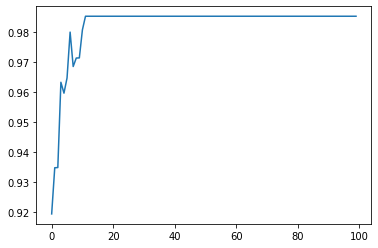

In [61]:
import seaborn as sns
sns.lineplot(x=[i for i in range(len(p40_1))][:100], y=p40_1[:100])

In [62]:
Pi['40'] # 5 каких-то фич по юзеру
# для данного пользователя наиболее важная 2 оценка.

[0.9081777254549406,
 1.3908085973930229,
 0.10653645431450687,
 0.4377446130581233,
 1.3277074730433025]

In [63]:
movies_sorted_by_1 = sorted([m for m in Qa], key=lambda x: Qa[x][1])

In [64]:
movies_sorted_by_1[:5]

['Heavy Metal (1981)',
 'Red Violin, The (Le Violon rouge) (1998)',
 'Pleasantville (1998)',
 'Matilda (1996)',
 'Herbie Goes to Monte Carlo (1977)']

In [65]:
movies_sorted_by_1[-5:]

['Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
 'Godfather: Part II, The (1974)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Wizard of Oz, The (1939)',
 'Moonstruck (1987)']

In [66]:
movies_sorted_by_2 = sorted([m for m in Qa], key=lambda x: Qa[x][2])

In [67]:
movies_sorted_by_2[:5]

['Mystery Men (1999)',
 'Duck Soup (1933)',
 'Fog, The (1980)',
 'Tank Girl (1995)',
 'Monkey Shines (1988)']

Выбираем 40 % пользователей и скрываем 40 % оценок.

In [76]:
Qa

{'Jumanji (1995)': [0.5666870616030519,
  0.8995707110978409,
  0.5778458609932986,
  0.5627292536064008,
  0.8702285277022161],
 'Great Escape, The (1963)': [1.444562112139094,
  1.016264201232442,
  0.7718163606513091,
  1.07672401841033,
  0.35524245862329346],
 'Force 10 from Navarone (1978)': [0.9492222536335329,
  -0.01637700974129366,
  0.5613274390910508,
  1.5605126916097716,
  0.17054263380807413],
 'Ben-Hur (1959)': [1.5917957784108818,
  0.9879972519834213,
  0.5292361224953345,
  0.6020473251582025,
  0.4557344984540073],
 'Lord of the Flies (1963)': [0.7729063100481922,
  0.5064382278611423,
  1.36658392026636,
  0.5821498067680111,
  0.5560962918959611],
 'Operation Dumbo Drop (1995)': [0.54982916738969,
  0.40030788108286164,
  0.15840026423304113,
  0.6738958415183547,
  0.9499271307735834],
 'M*A*S*H (1970)': [0.6290374385866935,
  1.1454833167199434,
  1.6218236412672922,
  0.27989789061552534,
  0.7029465962988393],
 'Aces: Iron Eagle III (1992)': [-0.01640885354566